In [1]:
import fns
from fns.functionsTFhardbound import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [ ]:
plt.style.use(['seaborn-paper'])
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})


In [ ]:
N, g, tauv, i, nu = 1000, 7,15,0,100
T = 10000

gpu = TfSingleNet(N=N,
                  T=T,
                  disp=False,
                  tauv=45,
                  device='/gpu:0',
                  spikeMonitor=False,
                  g0=g,
                  startPlast = 100,
                  nu = nu,
                  NUM_CORES = 1)
# gpu.input = apple
print(gpu.lowspthresh)
gpu.lowspthresh = 1.5
gpu.weight_step = 10
gpu.input = np.concatenate([np.zeros(T//2),np.ones(T//2)*50])
gpu.dt = 0.1
gpu.ratio = 0.05
gpu.FACT = 100
gpu.runTFSimul()

    

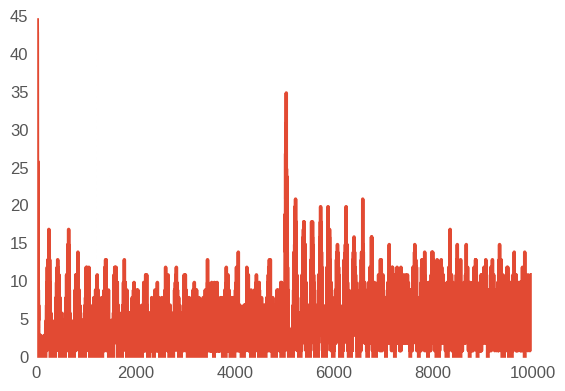

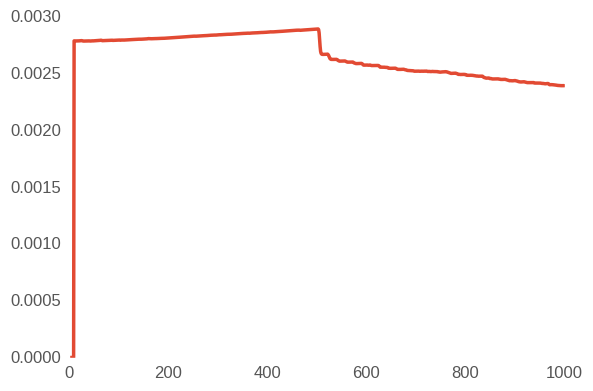

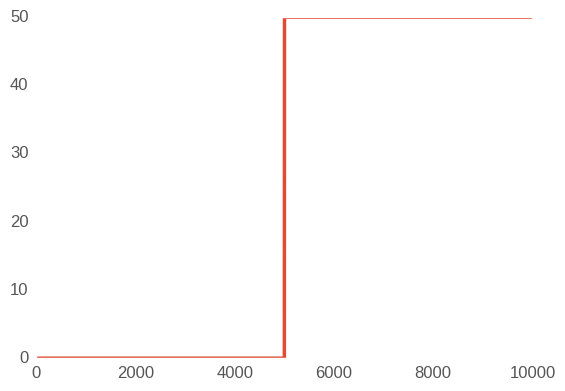

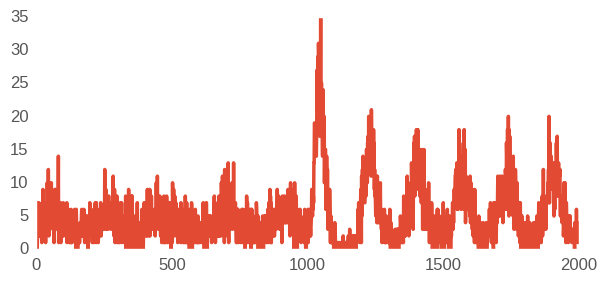

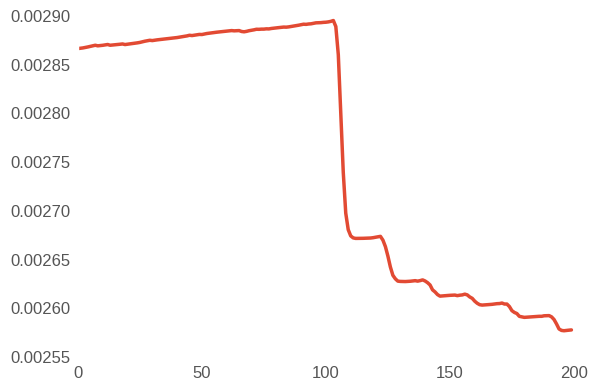

In [6]:
plt.plot(gpu.vvm[10:])
plt.figure()
plt.plot(gpu.gamma)
plt.figure()
plt.plot(gpu.input)

t0 = 4000
t1 = 6000
plt.figure(figsize=(7,3))
plt.plot(gpu.vvm[t0:t1])
plt.figure()
plt.plot(gpu.gamma[t0//gpu.weight_step:t1//gpu.weight_step])
# plt.figure()
# plt.plot(np.mean(np.array(gpu.lowsp).reshape(T,N).transpose(), axis=0))